In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from string import digits
from nltk.corpus import stopwords
import string
import nltk
import operator

In [2]:
df = pd.read_csv("/home/varun/Downloads/train.csv")

In [17]:
df['Tag'] = df['Label'].eq('Yes').astype(int)

In [18]:
df.head()

,Label,Text,Tag
0,No,>>> [1]Contact Me Now to Make $100 Today!$LINK,0
1,No,Act now to keep your life on the go!,0
2,No,Choose between $500 and $10000 dollars with up...,0
3,No,Click above to earn today.,0
4,No,Click here to receive your first $10 today:,0


In [20]:
df.groupby(['Tag']).count()

,Label,Text
Tag,,
0,1938,1938
1,1719,1719


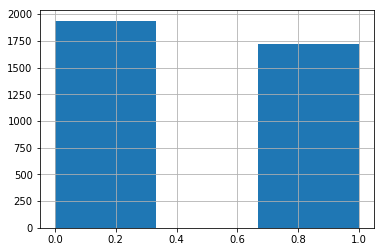

In [23]:
df["Tag"].hist(bins=3)

# Number of Yes's and No's are almost same. Since there is no data imbalance, we dont need to oversample or undersample data

In [26]:
from wordcloud import WordCloud, STOPWORDS 

In [34]:
with open("./Downloads/enron_train.txt") as f:
    lines =  f.readlines()                                                                            
    text = "".join(lines)

In [44]:
lemmatizer = WordNetLemmatizer()
def preProcess(sentence):
    stop = set(stopwords.words('english'))
    remove_punctuation = str.maketrans('','',string.punctuation)
#     remove_digits = str.maketrans('','',digits)
    sentence = sentence.translate(remove_punctuation)
#     sentence = sentence.translate(remove_digits).translate(remove_punctuation)
    tokens = [i for i in sentence.lower().split() if (i not in stop or len(i) > 3)]
    s=""
    for token in tokens:
        token = lemmatizer.lemmatize(token)
        s = s + ' ' + token
    return s;

In [54]:
new_text = preProcess(text)

In [57]:
new_text = new_text.replace("yes","")
new_text = new_text.replace("No","")

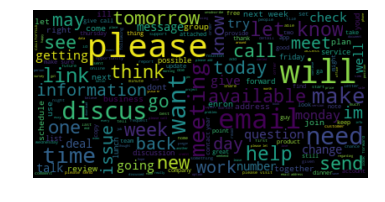

In [58]:
wordcloud = WordCloud(max_font_size=40).generate(new_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## As you can see in the wordcloud there are words like "please" "need" "may"  are more often,  This is because of request intent in email.
## While preprocessing the data we can replace all time related words(Monday, today, week) with a same key word,  but it dosent make much of a difference.